In [120]:
import numpy as np
import copy # for copying internal variables in lists
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import parameters_MF_MB as PRM
from functions_MF_MB import optimal_value_iteration
import simulations_MF_MB as SIM
import analyzes_MF_MB as ALY
import figures_indiv as GRAPH_i
import figures_pop as GRAPH_p
import figure_qvalue_map as GRAPH_Qmap
# import importlib
# importlib.reload(SIM)

# Reloading modules automatically :
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [121]:
print(PRM.params) # initial set of PRM for reference

{'n_individuals': 100, 'n_trials': 50, 'n_individuals_sims': {'learning': 100, 'generalization': 100, 'fast_test': 10}, 'n_trials_sims': {'learning': 50, 'generalization': 6, 'fast_test': 10}, 'alpha': 0.8, 'beta': 15.0, 'gamma': 0.9, 'alpha_vals': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'beta_vals': {'learning': 15.0, 'generalization': 10.0, 'fast_test': 15.0}, 's_start': 35, 's_rw': 22, 'starting_points': {'learning': 35, 'generalization': [21, 34, 4], 'fast_test': 35}, 'reward_states': [22, 4], 'trial_change': 25, 'RSS': 90, 'RR': 20, 'n_seq_d': 6, 'RSS_d': 15, 'epsilon_d': 0.5, 'epsilon_p': 0.001, 'perc': 0.7, 'window': 5, 'n_types_replays': 5, 'replay_types': {0: 'No replay', 1: 'Backward replay', 2: 'Random replay', 3: 'Most diverse replay', 4: 'Prioritized sweeping', -1: 'Optimal policy'}, 'replay_refs': [0, 1, 2, 3, 4], 'nA': 8, 'nS': 36, 'state_coords': [(0.00320002, 0.0059351), (0.310727, 0.0241474), (0.593997, 0.152759), (0.724483, -0.118826), (0.9562

# Setting environment and parameters

In [122]:
det = True
# det = False

params = copy.deepcopy(PRM.params)
params = PRM.set_environment(params, deterministic=det)

# Labels for saving data
if det:
    env = '_D'
else:
    env = '_S'
    
# Methods for replays
convergence = False
method_p = 'arrival'

Transition matrix set to deterministic in params.


In [123]:
# params['RR'] = 3
# lab = 'RR3'

# Learning

Store the Q matrices of the first learning phase (before change of reward location), to be reused in the following generalization.

## Raw data

LEARNING...
Replay | Individual
--------------------
4 | 0
negative
negative
Trial 25
117 visits
[(35, 0, 35, 0), (35, 0, 35, 0), (35, 4, 28, 0), (28, 6, 26, 0), (26, 6, 0, 0), (0, 7, 6, 0), (6, 7, 7, 0), (7, 5, 9, 0), (9, 4, 10, 0), (10, 7, 22, 0), (22, 6, 22, 0), (22, 3, 10, 0), (10, 1, 11, 0), (11, 7, 9, 0), (9, 4, 10, 0), (10, 1, 11, 0), (11, 5, 10, 0), (10, 1, 11, 0), (11, 7, 9, 0), (9, 3, 11, 0), (11, 0, 7, 0), (7, 5, 9, 0), (9, 2, 11, 0), (11, 2, 5, 0), (5, 0, 6, 0), (6, 5, 11, 0), (11, 5, 10, 0), (10, 1, 11, 0), (11, 2, 5, 0), (5, 0, 6, 0), (6, 5, 11, 0), (11, 2, 5, 0), (5, 7, 6, 0), (6, 7, 7, 0), (7, 5, 9, 0), (9, 3, 11, 0), (11, 0, 7, 0), (7, 3, 6, 0), (6, 5, 11, 0), (11, 7, 9, 0), (9, 4, 10, 0), (10, 1, 11, 0), (11, 0, 7, 0), (7, 3, 6, 0), (6, 7, 7, 0), (7, 5, 9, 0), (9, 3, 11, 0), (11, 7, 9, 0), (9, 4, 10, 0), (10, 1, 11, 0), (11, 2, 5, 0), (5, 0, 6, 0), (6, 6, 7, 0), (7, 5, 9, 0), (9, 2, 11, 0), (11, 7, 9, 0), (9, 2, 11, 0), (11, 5, 10, 0), (10, 1, 11, 0), (11, 0, 7, 0), (

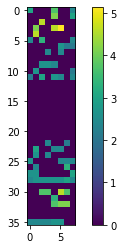

LEARNING finished


In [133]:
# params = copy.deepcopy(PRM.params) # /!\ set the environment
params = PRM.set_simulation(params, 'learning')
params['replay_refs'] = [0,1,2,4]
params['replay_refs'] = [4]
params['n_individuals'] = 1

# method_p = 'predecessor'
Data, Model = SIM.simulate_population(params, convergence=convergence, method_p=method_p)

# SIM.save_data(Data, 'Dl'+env)
# SIM.save_data(Model, 'Model'+env, df=False)

## Learning curves - Performance of the population for each trial

In [105]:
Data = SIM.recover_data('Dl'+env)

LC = ALY.compute_performance_in_time(Data, params)

SIM.save_data(LC, 'LCl'+env)

## Slitting in periods, before and after change of reward state

In [106]:
Data = SIM.recover_data('Dl'+env)

Data0, Data1, params0, params1 = ALY.split_before_after_change(Data)

SIM.save_data(Data0, 'Dl0'+env)
SIM.save_data(Data1, 'Dl1'+env)

## Performance of individuals over some trials

In [107]:
Data0 = SIM.recover_data('Dl0'+env)
Data1 = SIM.recover_data('Dl1'+env)

PRFl0_5f = ALY.compute_performance_across_population(Data0, tmin=0, tmax=5, params=params)
PRFl0_5l = ALY.compute_performance_across_population(Data0, tmin=20, tmax=25, params=params)
PRFl1_5f = ALY.compute_performance_across_population(Data1, tmin=0, tmax=5, params=params)
PRFl1_5l = ALY.compute_performance_across_population(Data1, tmin=20, tmax=25, params=params)

SIM.save_data(PRFl0_5f, 'PRFl0_5f'+env)
SIM.save_data(PRFl0_5l, 'PRFl0_5l'+env)
SIM.save_data(PRFl1_5f, 'PRFl1_5f'+env)
SIM.save_data(PRFl1_5l, 'PRFl1_5l'+env)

## Convergence times

It only makes sense to compute convergence on separate phases of the simulations, on which the reward state is kept constant. Therefore, only two files are produced.

In [108]:
Data0 = SIM.recover_data('Dl0'+env)
Data1 = SIM.recover_data('Dl1'+env)

CV0, NonCV0 = ALY.compute_convergence(Data0, params=params0)
CV1, NonCV1 = ALY.compute_convergence(Data1, params=params1)

SIM.save_data(CV0, 'CVl0'+env)
SIM.save_data(CV1, 'CVl1'+env)
SIM.save_data(NonCV0, 'NonCVl0'+env, df=False)
SIM.save_data(NonCV1, 'NonCVl1'+env, df=False)

# Generalization

Use the Q matrices obtained at the end of the first learning epoch.

## Raw data

In [108]:
Model = SIM.recover_data('Model'+env, df=False)

for g in range(len(params['starting_points']['generalization'])):
    params = PRM.set_simulation(params, sim='generalization', gen_test=g)

    Data = SIM.simulate_generalization(params, Model)
    
    SIM.save_data(Data, 'Dg{}'.format(g)+env)

GENERALIZATION...
Replay | Individual
--------------------
0 | 0
0 | 1
0 | 2
0 | 3
0 | 4
0 | 5
0 | 6
0 | 7
0 | 8
0 | 9
0 | 10
0 | 11
0 | 12
0 | 13
0 | 14
0 | 15
0 | 16
0 | 17
0 | 18
0 | 19
0 | 20
0 | 21
0 | 22
0 | 23
0 | 24
0 | 25
0 | 26
0 | 27
0 | 28
0 | 29
0 | 30
0 | 31
0 | 32
0 | 33
0 | 34
0 | 35
0 | 36
0 | 37
0 | 38
0 | 39
0 | 40
0 | 41
0 | 42
0 | 43
0 | 44
0 | 45
0 | 46
0 | 47
0 | 48
0 | 49
0 | 50
0 | 51
0 | 52
0 | 53
0 | 54
0 | 55
0 | 56
0 | 57
0 | 58
0 | 59
0 | 60
0 | 61
0 | 62
0 | 63
0 | 64
0 | 65
0 | 66
0 | 67
0 | 68
0 | 69
0 | 70
0 | 71
0 | 72
0 | 73
0 | 74
0 | 75
0 | 76
0 | 77
0 | 78
0 | 79
0 | 80
0 | 81
0 | 82
0 | 83
0 | 84
0 | 85
0 | 86
0 | 87
0 | 88
0 | 89
0 | 90
0 | 91
0 | 92
0 | 93
0 | 94
0 | 95
0 | 96
0 | 97
0 | 98
0 | 99
--------------------
1 | 0
1 | 1
1 | 2
1 | 3
1 | 4
1 | 5
1 | 6
1 | 7
1 | 8
1 | 9
1 | 10
1 | 11
1 | 12
1 | 13
1 | 14
1 | 15
1 | 16
1 | 17
1 | 18
1 | 19
1 | 20
1 | 21
1 | 22
1 | 23
1 | 24
1 | 25
1 | 26
1 | 27
1 | 28
1 | 29
1 | 30
1 | 31
1 | 32
1 | 33
1 

1 | 41
1 | 42
1 | 43
1 | 44
1 | 45
1 | 46
1 | 47
1 | 48
1 | 49
1 | 50
1 | 51
1 | 52
1 | 53
1 | 54
1 | 55
1 | 56
1 | 57
1 | 58
1 | 59
1 | 60
1 | 61
1 | 62
1 | 63
1 | 64
1 | 65
1 | 66
1 | 67
1 | 68
1 | 69
1 | 70
1 | 71
1 | 72
1 | 73
1 | 74
1 | 75
1 | 76
1 | 77
1 | 78
1 | 79
1 | 80
1 | 81
1 | 82
1 | 83
1 | 84
1 | 85
1 | 86
1 | 87
1 | 88
1 | 89
1 | 90
1 | 91
1 | 92
1 | 93
1 | 94
1 | 95
1 | 96
1 | 97
1 | 98
1 | 99
--------------------
2 | 0
2 | 1
2 | 2
2 | 3
2 | 4
2 | 5
2 | 6
2 | 7
2 | 8
2 | 9
2 | 10
2 | 11
2 | 12
2 | 13
2 | 14
2 | 15
2 | 16
2 | 17
2 | 18
2 | 19
2 | 20
2 | 21
2 | 22
2 | 23
2 | 24
2 | 25
2 | 26
2 | 27
2 | 28
2 | 29
2 | 30
2 | 31
2 | 32
2 | 33
2 | 34
2 | 35
2 | 36
2 | 37
2 | 38
2 | 39
2 | 40
2 | 41
2 | 42
2 | 43
2 | 44
2 | 45
2 | 46
2 | 47
2 | 48
2 | 49
2 | 50
2 | 51
2 | 52
2 | 53
2 | 54
2 | 55
2 | 56
2 | 57
2 | 58
2 | 59
2 | 60
2 | 61
2 | 62
2 | 63
2 | 64
2 | 65
2 | 66
2 | 67
2 | 68
2 | 69
2 | 70
2 | 71
2 | 72
2 | 73
2 | 74
2 | 75
2 | 76
2 | 77
2 | 78
2 | 79
2 | 80
2 | 81
2 

## Learning curves - Performance of the population for each trial

In [109]:
for g in range(len(params['starting_points']['generalization'])):
    params = PRM.set_simulation(params, sim='generalization', gen_test=g)
    Data = SIM.recover_data('Dg{}'.format(g)+env)

    LC = ALY.compute_performance_in_time(Data, params)

    SIM.save_data(LC, 'LCg{}'.format(g)+env)

## Performance of individuals across trials

In [110]:
for g in range(len(params['starting_points']['generalization'])):
    params = PRM.set_simulation(params, sim='generalization', gen_test=g)
    Data = SIM.recover_data('Dg{}'.format(g)+env)

    PRF = ALY.compute_performance_across_population(Data, params=params)

    SIM.save_data(PRF, 'PRFg{}'.format(g)+env)

# Individual trajectories

Most representative individual :  0


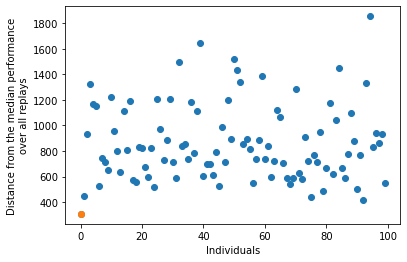

In [109]:
Dl0 = SIM.recover_data('Dl0'+env)
LCl = SIM.recover_data('LCl'+env)
LCl0, LCl1, _, _ = ALY.split_before_after_change(LCl, params=params)
SIM.save_data(LCl0, 'LCl0'+env)
SIM.save_data(LCl1, 'LCl1'+env)

params = copy.deepcopy(PRM.params)
# params['RR'] = 3
params['replay_refs'] = [0,1,2,4]
i_repr = ALY.identify_representative(Dl0, LCl0, params=params)

In [114]:
Dl_indiv, LC_indiv, Model_indiv = SIM.get_individual_data_per_trial(i_indiv=i_repr, params=params, convergence=convergence, method_p=method_p)
# Dg_trials, LCg_indiv, _ = SIM.get_individual_data_per_trial(i_indiv=i_repr, params=params, Models0=Models)

LCl0_indiv, LCl1_indiv, _, _ = ALY.split_before_after_change(LC_indiv, params=params)

SIM.save_data(Dl_indiv, 'Dl_indiv'+env, df=False)
SIM.save_data(LC_indiv, 'LC_indiv'+env)
SIM.save_data(LCl0_indiv, 'LCl0_indiv'+env)
SIM.save_data(LCl0_indiv, 'LCl1_indiv'+env)
SIM.save_data(Model_indiv, 'Model_indiv'+env, df=False)

In [ ]:
Dl_indiv, LC_indiv, Model_indiv = SIM.get_individual_data_per_trial(i_indiv=i_repr, params=params, convergence=convergence, method_p=method_p)

# Histograms

In [88]:
# Optimal Q-value map
params = copy.deepcopy(PRM.params)
params = PRM.set_environment(params, deterministic=det)
Qopt = optimal_value_iteration(params)
SIM.save_data(Qopt, 'Qopt'+env, df=False)

Transition matrix set to deterministic in params.


In [89]:
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]
Models = SIM.recover_data('Model'+env, df=False)

H_indiv = ALY.compute_individual_histograms(Models, Qopt=Qopt, params=params, nbins=10)
H_pop = ALY.compute_population_histogram(H_indiv, params=params)
SIM.save_data(H_indiv, 'Hindiv'+env, df=False)
SIM.save_data(H_pop, 'Hpop'+env, df=False)

In [90]:
EMD, KS = ALY.compute_individual_distances(Models, Qopt=Qopt, params=params)
EMD_pop, Stat_emd = ALY.compute_population_distances(EMD, KS, params=params)
SIM.save_data(EMD, 'EMDindiv'+env, df=False)
SIM.save_data(KS, 'KSindiv'+env, df=False)
SIM.save_data(EMD_pop, 'EMDpop'+env, df=False)
SIM.save_data(Stat_emd, 'StatEMD'+env, df=False)

# Testing alpha parameter

## Computing full raw data

In [87]:
alpha_vals = PRM.params['alpha_vals']
print('Alpha values:', alpha_vals)

Alpha values: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [88]:
for det, env in zip([True, False],['_D','_S']):
    
    params = copy.deepcopy(PRM.params)
    params = PRM.set_environment(params, deterministic=det)
    
    for alpha in alpha_vals:
        print('alpha = {}'.format(alpha))
        params['alpha'] = alpha # set parameter value
        
        Data, _ = SIM.simulate_population(params) # pass the modified dictionary in argument
        
        SIM.save_data(Data, 'D-alpha{}'.format(alpha)+env)

Transition matrix set to deterministic in params.
alpha = 0.0
LEARNING...
Replay | Individual
--------------------
0 | 0
0 | 1
0 | 2
0 | 3
0 | 4
0 | 5
0 | 6
0 | 7
0 | 8
0 | 9
0 | 10
0 | 11
0 | 12
0 | 13
0 | 14
0 | 15
0 | 16
0 | 17
0 | 18
0 | 19
0 | 20
0 | 21
0 | 22
0 | 23
0 | 24
0 | 25
0 | 26
0 | 27
0 | 28
0 | 29
0 | 30
0 | 31
0 | 32
0 | 33
0 | 34
0 | 35
0 | 36
0 | 37
0 | 38
0 | 39
0 | 40
0 | 41
0 | 42
0 | 43
0 | 44
0 | 45
0 | 46
0 | 47
0 | 48
0 | 49
0 | 50
0 | 51
0 | 52
0 | 53
0 | 54
0 | 55
0 | 56
0 | 57
0 | 58
0 | 59
0 | 60
0 | 61
0 | 62
0 | 63
0 | 64
0 | 65
0 | 66
0 | 67
0 | 68
0 | 69
0 | 70
0 | 71
0 | 72
0 | 73
0 | 74
0 | 75
0 | 76
0 | 77
0 | 78
0 | 79
0 | 80
0 | 81
0 | 82
0 | 83
0 | 84
0 | 85
0 | 86
0 | 87
0 | 88
0 | 89
0 | 90
0 | 91
0 | 92
0 | 93
0 | 94
0 | 95
0 | 96
0 | 97
0 | 98
0 | 99
--------------------
1 | 0
1 | 1
1 | 2
1 | 3
1 | 4
1 | 5
1 | 6
1 | 7
1 | 8
1 | 9
1 | 10
1 | 11
1 | 12
1 | 13
1 | 14
1 | 15
1 | 16
1 | 17
1 | 18
1 | 19
1 | 20
1 | 21
1 | 22
1 | 23
1 | 24
1 | 25
1 

KeyboardInterrupt: 

## Optimizing parameter

In [19]:
for det, env in zip([True, False],['_D','_S']):
    params = copy.deepcopy(PRM.params)
    params = PRM.set_environment(params, deterministic=det)
    
    D_D, D_S = ALY.compare_alpha_replays(deterministic=det, params=params)

D_D

Transition matrix set to deterministic in params.
Deterministic
Computing...
alpha 0.0
alpha 0.1
alpha 0.2
alpha 0.3
alpha 0.4
alpha 0.5
alpha 0.6
alpha 0.7
alpha 0.8
alpha 0.9
alpha 1.0
Done
Stochastic
Computing...
alpha 0.0
alpha 0.1
alpha 0.2
alpha 0.3
alpha 0.4
alpha 0.5
alpha 0.6
alpha 0.7
alpha 0.8
alpha 0.9
alpha 1.0
Done
Transition matrix set to stochastic in params.
Deterministic
Computing...
alpha 0.0
alpha 0.1
alpha 0.2
alpha 0.3
alpha 0.4
alpha 0.5
alpha 0.6
alpha 0.7
alpha 0.8
alpha 0.9
alpha 1.0
Done
Stochastic
Computing...
alpha 0.0
alpha 0.1
alpha 0.2
alpha 0.3
alpha 0.4
alpha 0.5
alpha 0.6
alpha 0.7
alpha 0.8
alpha 0.9
alpha 1.0
Done


In [12]:
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]
D_alpha_summary = ALY.optimize_alpha(params=params)
D_alpha_summary

Computing...
alpha 0.0
alpha 0.1
alpha 0.2
alpha 0.3
alpha 0.4
alpha 0.5
alpha 0.6
alpha 0.7
alpha 0.8
alpha 0.9
alpha 1.0
Done


,alpha,Mean D,STD D,Q1 D,Q2 D,Q3 D,Mean S,STD S,Q1 S,Q2 S,Q3 S,Mean tot,STD tot,Q1 tot,Q2 tot,Q3 tot
0,0.0,97.13700,44.324556,87.940,115.54,127.160,97.96305,33.942984,88.260,108.98,121.905,97.550025,39.478688,88.260,111.29,125.400
1,0.1,46.51610,27.808705,22.995,38.20,70.630,63.63585,26.560869,42.580,63.12,83.625,55.075975,28.507427,30.235,53.05,76.810
2,0.2,38.52010,22.076975,19.585,32.89,54.045,55.62730,24.932863,35.665,53.67,72.560,47.073700,25.053629,26.215,42.71,64.860
3,0.3,36.75280,21.541108,18.940,30.29,48.080,51.11255,22.357822,33.970,47.74,62.875,43.932675,23.097540,25.835,40.64,58.455
4,0.4,33.77165,19.192529,18.520,28.98,44.305,50.63795,21.957976,33.695,46.23,63.485,42.204800,22.279384,25.095,37.83,55.040
5,0.5,32.07535,17.056350,18.360,27.22,40.965,49.72700,24.130981,32.495,44.60,59.685,40.901175,22.682744,24.290,36.39,51.805
6,0.6,29.88535,15.635881,17.935,25.03,38.000,47.96160,22.544035,32.500,42.31,58.565,38.923475,21.401982,23.015,34.66,48.680
7,0.7,29.73500,17.734126,17.600,23.54,36.290,49.30715,23.717419,33.520,42.72,59.085,39.521075,23.114387,21.835,34.39,50.225
8,0.8,27.78400,13.986301,17.360,23.74,34.715,48.41415,20.402233,33.055,44.93,59.955,38.099075,20.306025,21.940,33.54,49.010
9,0.9,28.87635,15.168817,17.640,24.48,36.740,52.55560,28.204945,33.005,46.04,64.530,40.715975,25.553526,22.395,34.70,51.390


In [11]:
Data_all = SIM.recover_data('D-alpha_D')
Data_all

,Unnamed: 0,Replay type,alpha,Mean,STD,Q1,Q2,Q3
0,0,0,0.0,121.4524,14.111311,111.305,122.55,129.975
1,1,0,0.1,81.3738,13.524854,72.600,81.54,88.620
2,2,0,0.2,62.9246,16.205504,51.790,62.40,73.325
3,3,0,0.3,54.8808,18.699882,40.575,51.23,66.170
4,4,0,0.4,45.2118,14.319199,35.140,42.74,51.680
5,5,0,0.5,39.7698,13.543082,30.165,36.92,44.935
6,6,0,0.6,37.7174,12.866745,29.160,36.22,44.110
7,7,0,0.7,35.5510,14.196534,25.115,32.01,40.210
8,8,0,0.8,35.2956,13.376539,26.495,31.78,41.395
9,9,0,0.9,33.9510,11.569900,24.935,31.50,41.455


# Testing the number of replays

In [135]:
path = '/R_tests/'
for RR in [1, 10, 20]:
    for RSS in [10, 50, 90]:
        params = copy.deepcopy(PRM.params)
        params['RR'] = RR
        params['RSS'] = RSS
        params['replay_refs'] = [0,1,2,4]
        lab = '_RR{}_RSS{}'.format(RR, RSS)
        
        Data, Model = SIM.simulate_population(params, convergence=convergence, method_p=method_p)
        SIM.save_data(Data, path+'Dl'+lab+env)
        SIM.save_data(Model, path+'Model'+lab+env, df=False)
        
        LC = ALY.compute_performance_in_time(Data, params)
        SIM.save_data(LC, path+'LCl'+lab+env)
        
        Data0, Data1, params0, params1 = ALY.split_before_after_change(Data)
        PRFl0_5f = ALY.compute_performance_across_population(Data0, tmin=0, tmax=5, params=params)
        PRFl0_5l = ALY.compute_performance_across_population(Data0, tmin=20, tmax=25, params=params)
        PRFl1_5f = ALY.compute_performance_across_population(Data1, tmin=0, tmax=5, params=params)
        PRFl1_5l = ALY.compute_performance_across_population(Data1, tmin=20, tmax=25, params=params)
        SIM.save_data(PRFl0_5f, path+'PRFl0_5f'+lab+env)
        SIM.save_data(PRFl0_5l, path+'PRFl0_5l'+lab+env)
        SIM.save_data(PRFl1_5f, path+'PRFl1_5f'+lab+env)
        SIM.save_data(PRFl1_5l, path+'PRFl1_5l'+lab+env)

LEARNING...
Replay | Individual
--------------------
0 | 0
0 | 1
0 | 2
0 | 3
0 | 4
0 | 5
0 | 6
0 | 7
0 | 8
0 | 9
0 | 10
0 | 11
0 | 12
0 | 13
0 | 14
0 | 15
0 | 16
0 | 17
0 | 18
0 | 19
0 | 20
0 | 21
0 | 22
0 | 23
0 | 24
0 | 25
0 | 26
0 | 27
0 | 28
0 | 29
0 | 30
0 | 31
0 | 32
0 | 33
0 | 34
0 | 35
0 | 36
0 | 37
0 | 38
0 | 39
0 | 40
0 | 41
0 | 42
0 | 43
0 | 44
0 | 45
0 | 46
0 | 47
0 | 48
0 | 49
0 | 50
0 | 51
0 | 52
0 | 53
0 | 54
0 | 55
0 | 56
0 | 57
0 | 58
0 | 59
0 | 60
0 | 61
0 | 62
0 | 63
0 | 64
0 | 65
0 | 66
0 | 67
0 | 68
0 | 69
0 | 70
0 | 71
0 | 72
0 | 73
0 | 74
0 | 75
0 | 76
0 | 77
0 | 78
0 | 79
0 | 80
0 | 81
0 | 82
0 | 83
0 | 84
0 | 85
0 | 86
0 | 87
0 | 88
0 | 89
0 | 90
0 | 91
0 | 92
0 | 93
0 | 94
0 | 95
0 | 96
0 | 97
0 | 98
0 | 99
--------------------
1 | 0
1 | 1
1 | 2
1 | 3
1 | 4
1 | 5
1 | 6
1 | 7
1 | 8
1 | 9
1 | 10
1 | 11
1 | 12
1 | 13
1 | 14
1 | 15
1 | 16
1 | 17
1 | 18
1 | 19
1 | 20
1 | 21
1 | 22
1 | 23
1 | 24
1 | 25
1 | 26
1 | 27
1 | 28
1 | 29
1 | 30
1 | 31
1 | 32
1 | 33
1 | 34
1

4 | 33
4 | 34
4 | 35
4 | 36
4 | 37
4 | 38
4 | 39
4 | 40
4 | 41
4 | 42
4 | 43
4 | 44
4 | 45
4 | 46
4 | 47
4 | 48
4 | 49
4 | 50
4 | 51
4 | 52
4 | 53
4 | 54
4 | 55
4 | 56
4 | 57
4 | 58
4 | 59
4 | 60
4 | 61
4 | 62
4 | 63
4 | 64
4 | 65
4 | 66
4 | 67
4 | 68
4 | 69
4 | 70
4 | 71
4 | 72
4 | 73
4 | 74
4 | 75
4 | 76
4 | 77
4 | 78
4 | 79
4 | 80
4 | 81
4 | 82
4 | 83
4 | 84
4 | 85
4 | 86
4 | 87
4 | 88
4 | 89
4 | 90
4 | 91
4 | 92
4 | 93
4 | 94
4 | 95
4 | 96
4 | 97
4 | 98
4 | 99
LEARNING finished
LEARNING...
Replay | Individual
--------------------
0 | 0
0 | 1
0 | 2
0 | 3
0 | 4
0 | 5
0 | 6
0 | 7
0 | 8
0 | 9
0 | 10
0 | 11
0 | 12
0 | 13
0 | 14
0 | 15
0 | 16
0 | 17
0 | 18
0 | 19
0 | 20
0 | 21
0 | 22
0 | 23
0 | 24
0 | 25
0 | 26
0 | 27
0 | 28
0 | 29
0 | 30
0 | 31
0 | 32
0 | 33
0 | 34
0 | 35
0 | 36
0 | 37
0 | 38
0 | 39
0 | 40
0 | 41
0 | 42
0 | 43
0 | 44
0 | 45
0 | 46
0 | 47
0 | 48
0 | 49
0 | 50
0 | 51
0 | 52
0 | 53
0 | 54
0 | 55
0 | 56
0 | 57
0 | 58
0 | 59
0 | 60
0 | 61
0 | 62
0 | 63
0 | 64
0 | 65
0 | 66
0

2 | 65
2 | 66
2 | 67
2 | 68
2 | 69
2 | 70
2 | 71
2 | 72
2 | 73
2 | 74
2 | 75
2 | 76
2 | 77
2 | 78
2 | 79
2 | 80
2 | 81
2 | 82
2 | 83
2 | 84
2 | 85
2 | 86
2 | 87
2 | 88
2 | 89
2 | 90
2 | 91
2 | 92
2 | 93
2 | 94
2 | 95
2 | 96
2 | 97
2 | 98
2 | 99
--------------------
4 | 0
4 | 1
4 | 2
4 | 3
4 | 4
4 | 5
4 | 6
4 | 7
4 | 8
4 | 9
4 | 10
4 | 11
4 | 12
4 | 13
4 | 14
4 | 15
4 | 16
4 | 17
4 | 18
4 | 19
4 | 20
4 | 21
4 | 22
4 | 23
4 | 24
4 | 25
4 | 26
4 | 27
4 | 28
4 | 29
4 | 30
4 | 31
4 | 32
4 | 33
4 | 34
4 | 35
4 | 36
4 | 37
4 | 38
4 | 39
4 | 40
4 | 41
4 | 42
4 | 43
4 | 44
4 | 45
4 | 46
4 | 47
4 | 48
4 | 49
4 | 50
4 | 51
4 | 52
4 | 53
4 | 54
4 | 55
4 | 56
4 | 57
4 | 58
4 | 59
4 | 60
4 | 61
4 | 62
4 | 63
4 | 64
4 | 65
4 | 66
4 | 67
4 | 68
4 | 69
4 | 70
4 | 71
4 | 72
4 | 73
4 | 74
4 | 75
4 | 76
4 | 77
4 | 78
4 | 79
4 | 80
4 | 81
4 | 82
4 | 83
4 | 84
4 | 85
4 | 86
4 | 87
4 | 88
4 | 89
4 | 90
4 | 91
4 | 92
4 | 93
4 | 94
4 | 95
4 | 96
4 | 97
4 | 98
4 | 99
LEARNING finished
LEARNING...
Replay | Indiv

1 | 97
1 | 98
1 | 99
--------------------
2 | 0
2 | 1
2 | 2
2 | 3
2 | 4
2 | 5
2 | 6
2 | 7
2 | 8
2 | 9
2 | 10
2 | 11
2 | 12
2 | 13
2 | 14
2 | 15
2 | 16
2 | 17
2 | 18
2 | 19
2 | 20
2 | 21
2 | 22
2 | 23
2 | 24
2 | 25
2 | 26
2 | 27
2 | 28
2 | 29
2 | 30
2 | 31
2 | 32
2 | 33
2 | 34
2 | 35
2 | 36
2 | 37
2 | 38
2 | 39
2 | 40
2 | 41
2 | 42
2 | 43
2 | 44
2 | 45
2 | 46
2 | 47
2 | 48
2 | 49
2 | 50
2 | 51
2 | 52
2 | 53
2 | 54
2 | 55
2 | 56
2 | 57
2 | 58
2 | 59
2 | 60
2 | 61
2 | 62
2 | 63
2 | 64
2 | 65
2 | 66
2 | 67
2 | 68
2 | 69
2 | 70
2 | 71
2 | 72
2 | 73
2 | 74
2 | 75
2 | 76
2 | 77
2 | 78
2 | 79
2 | 80
2 | 81
2 | 82
2 | 83
2 | 84
2 | 85
2 | 86
2 | 87
2 | 88
2 | 89
2 | 90
2 | 91
2 | 92
2 | 93
2 | 94
2 | 95
2 | 96
2 | 97
2 | 98
2 | 99
--------------------
4 | 0
4 | 1
4 | 2
4 | 3
4 | 4
4 | 5
4 | 6
4 | 7
4 | 8
4 | 9
4 | 10
4 | 11
4 | 12
4 | 13
4 | 14
4 | 15
4 | 16
4 | 17
4 | 18
4 | 19
4 | 20
4 | 21
4 | 22
4 | 23
4 | 24
4 | 25
4 | 26
4 | 27
4 | 28
4 | 29
4 | 30
4 | 31
4 | 32
4 | 33
4 | 34
4 | 35
4 | 3